In [24]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import math
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier


def Score(table, data, p_spam, p_non_spam, parameters_spam, parameters_non_spam, title, dataset):
    TP = 0 # True Positive
    FP = 0 # False Positive
    TN = 0 # True Negative
    FN = 0 # False Negative
    row = 0

    for i in range(len(data)):
        message = data.iloc[row:row+1, :-1]
        word_count = message.sum()
        p_spam_given_message = p_spam
        p_non_spam_given_message = p_non_spam
        col = 0

        for word in message:
            if word in parameters_spam:
                for count in range(word_count[col]):
                    p_spam_given_message += math.log(parameters_spam[word])#have to log cuz the probabilties too small
            if word in parameters_non_spam:
                for count in range(word_count[col]):
                    p_non_spam_given_message += math.log(parameters_non_spam[word])
            col += 1;

        if p_non_spam_given_message > p_spam_given_message:
            if data.iloc[row:row+1,-1:].sum().sum() == 0:
                TN += 1
            else:
                FN += 1

        elif p_spam_given_message > p_non_spam_given_message:
            if data.iloc[row:row+1,-1:].sum().sum() == 1:
                TP += 1
            else:
                FP += 1

        row += 1

    Accuracy = (TN + TP) / (TN + FP + TP + FN)
    Precision = TP / (TP + FP)
    Recall = TP / (TP + FN)
    F1_Score = (2 * Precision * Recall) / (Precision + Recall)

    scores = []
    scores.append(Accuracy)
    scores.append(Precision)
    scores.append(Recall)
    scores.append(F1_Score)
    scores = pd.DataFrame(scores)
    table = pd.concat([table,scores], axis = 1)

    return table

def Naive_Bayes_Classifier(table, train, test, title):
    
    # Create Vocabulary
    vocabulary = list(train.columns)
    vocabulary.remove('Label')
    print("Vocabulary length:", len(vocabulary))

    # Isolating spam and non-spam messages first
    spam_messages = train[train['Label'] == 1]
    non_spam_messages = train[train['Label'] == 0]

    # P(Spam) and P(Non-Spam)
    p_spam = len(spam_messages) / len(train)
    p_non_spam = len(non_spam_messages) / len(train)

    # N_Spam
    n_spam = spam_messages.iloc[:,1:-1].sum().sum()

    # N_Non-Spam
    n_non_spam = non_spam_messages.iloc[:,1:-1].sum().sum()

    # N_Vocabulary
    n_vocabulary = len(vocabulary)

    # Laplace smoothing
    alpha = 1

    # Initiate parameters
    parameters_spam = {unique_word:0 for unique_word in vocabulary}
    parameters_non_spam = {unique_word:0 for unique_word in vocabulary}

    # Calculate parameters
    for word in vocabulary:
        n_word_given_spam = spam_messages[word].sum() # spam_messages already defined
        p_word_given_spam = (n_word_given_spam + alpha) / (n_spam + alpha*n_vocabulary)
        parameters_spam[word] = p_word_given_spam

        n_word_given_non_spam = non_spam_messages[word].sum() # non_spam_messages already defined
        p_word_given_non_spam = (n_word_given_non_spam + alpha) / (n_non_spam + alpha*n_vocabulary)
        parameters_non_spam[word] = p_word_given_non_spam

    table = Score(table, test, p_spam, p_non_spam, parameters_spam, parameters_non_spam, title, "(TEST)")

    return table



        

In [34]:
def evaluate_dt(df_train, df_test, title):
    # Split the data into features and target variable
    column_names = list(df_train.columns[:-1])
    y_train = df_train['Label'].astype('category')
    X_train = df_train[column_names]

    y_test = df_test['Label'].astype('category')
    X_test = df_test[column_names]

    # Train a decision tree classifier
    dectree = DecisionTreeClassifier()
    dectree.fit(X_train, y_train)

    # Make predictions on the test data
    y_test_pred = dectree.predict(X_test)

    # Initialize an empty DataFrame for storing the metrics
    test_metrics_table = pd.DataFrame()

    # Call the visualize_preds function to plot the confusion matrix and calculate metrics for the test dataset
    test_metrics_table = visualize_preds(test_metrics_table, y_test, y_test_pred, title)

    test_metrics_table.columns = ['Test']
    test_metrics_table.index = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

    return dectree, test_metrics_table


In [30]:
def visualize_preds(table, y_true, y_pred, title):
    scores = []
    f = plt.figure(figsize = (8,8))
    cf = confusion_matrix(y_true, y_pred)
    sb.heatmap(cf, fmt='.0f', annot=True)

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    scores.append(accuracy)
    scores.append(precision)å
    scores.append(recall)
    scores.append(f1)
    scores = pd.DataFrame(scores)
    table = pd.concat([table,scores], axis = 1)

    stats_text = "\n\nAccuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nF1 Score={:0.2f}".format(
        accuracy, precision, recall, f1)

    plt.xlabel('Predicted' + stats_text)
    plt.ylabel('Actual')
    plt.title(title)

    return table

In [16]:
df_oversampled = pd.read_csv("Dataset/oversampled_train.csv")
df_smote_tomek = pd.read_csv("Dataset/smote_tomek_train.csv")
df_smoteen = pd.read_csv("Dataset/smoteenn_train.csv")
df_undersampled = pd.read_csv("Dataset/undersampled_train.csv")
df_test = pd.read_csv("Dataset/test_data.csv")

# NaiveBayes

# DecisionTree

In [28]:
all_metrics_table = pd.DataFrame()

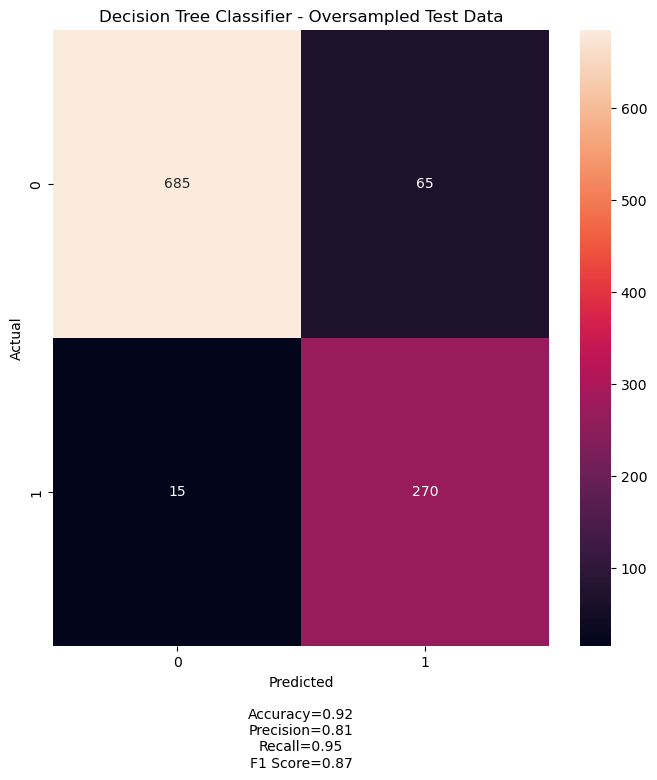

In [35]:
oversampled_metrics = evaluate_dt(df_oversampled, df_test, "Decision Tree Classifier - Oversampled Test Data")



(DecisionTreeClassifier(),
                Test
 Accuracy   0.916908
 Precision  0.804281
 Recall     0.922807
 F1 Score   0.859477)

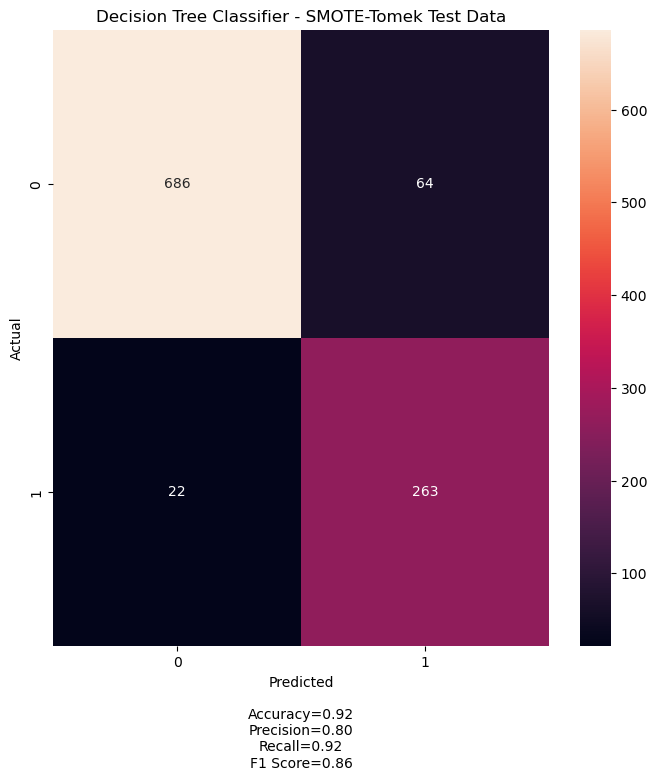

In [36]:
smote_tomek_metrics = evaluate_dt(df_smote_tomek, df_test, "Decision Tree Classifier - SMOTE-Tomek Test Data")
smote_tomek_metrics

(DecisionTreeClassifier(),
                Test
 Accuracy   0.892754
 Precision  0.739011
 Recall     0.943860
 F1 Score   0.828968)

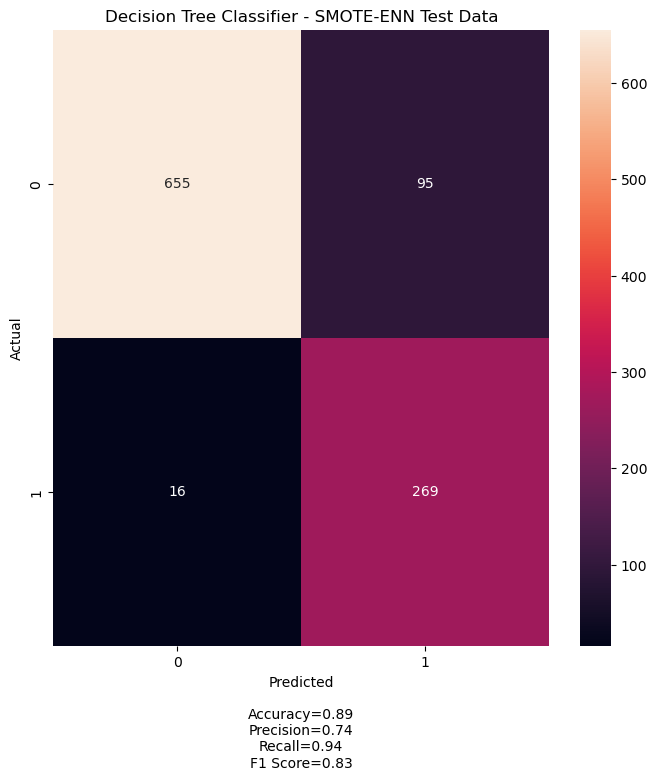

In [37]:
smoteenn_metrics = evaluate_dt(df_smoteen, df_test, "Decision Tree Classifier - SMOTE-ENN Test Data")
smoteenn_metrics

(DecisionTreeClassifier(),
                Test
 Accuracy   0.924638
 Precision  0.810811
 Recall     0.947368
 F1 Score   0.873786)

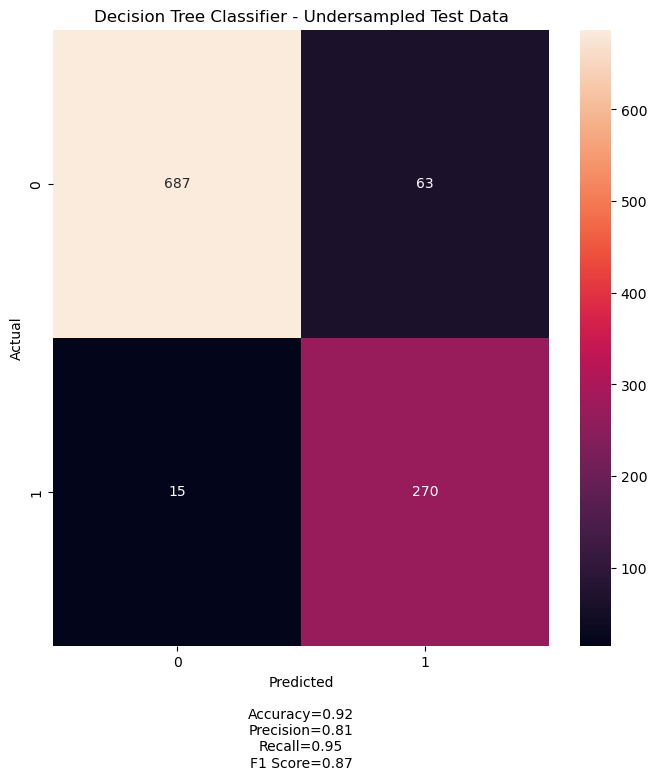

In [38]:
undersampled_metrics = evaluate_dt(df_undersampled, df_test, "Decision Tree Classifier - Undersampled Test Data")
undersampled_metrics

In [69]:
def evaluate_dt_2(train_datasets, df_test, dataset_names):
    test_metrics_table = pd.DataFrame()
    
    for df_train, name in zip(train_datasets, dataset_names):
        # Split the data into features and target variable
        column_names = list(df_train.columns[:-1])
        y_train = df_train['Label'].astype('category')
        X_train = df_train[column_names]

        y_test = df_test['Label'].astype('category')
        X_test = df_test[column_names]

        # Train a decision tree classifier
        dectree = DecisionTreeClassifier()
        dectree.fit(X_train, y_train)

        # Make predictions on the training and test data
        y_train_pred = dectree.predict(X_train)
        y_test_pred = dectree.predict(X_test)

        # Call the visualize_preds_2 function to calculate metrics for test datasets
        test_metrics_table = visualize_preds_2(test_metrics_table, y_test, y_test_pred, f"Decision Tree Classifier - {name}")

    test_metrics_table.columns = dataset_names
    test_metrics_table.index = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'False Positive Rate']

    return test_metrics_table

def visualize_preds_2(metrics_table, y_true, y_pred, name):
    # Calculate the evaluation metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    
    # Calculate the False Positive Rate
    cm = confusion_matrix(y_true, y_pred)
    FP = cm.sum(axis=0) - np.diag(cm)  # Sum of False Positives for each class
    FN = cm.sum(axis=1) - np.diag(cm)  # Sum of False Negatives for each class
    TP = np.diag(cm)  # Sum of True Positives for each class
    TN = cm.sum() - (FP + FN + TP)  # Sum of True Negatives for each class

    # Calculate the False Positive Rate
    FPR = FP / (FP + TN)
    
    # Calculate the average False Positive Rate (weighted by the support)
    avg_FPR = np.average(FPR, weights=np.bincount(y_true))

    # Add the evaluation metrics to the metrics_table
    metrics_table[name] = [accuracy, precision, recall, f1, avg_FPR]

    return metrics_table





In [44]:
def visualize_preds(table, y_true, y_pred, title, ax):
    scores = []
    cf = confusion_matrix(y_true, y_pred)
    sb.heatmap(cf, fmt='.0f', annot=True, ax=ax)

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Calculate False Positive Rate
    fp = cf[0][1]
    tn = cf[0][0]
    fpr = fp / (tn + fp)

    scores.append(accuracy)
    scores.append(precision)
    scores.append(recall)
    scores.append(f1)
    scores.append(fpr)
    scores = pd.DataFrame(scores)
    table = pd.concat([table, scores], axis=1)

    stats_text = "\n\nAccuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nF1 Score={:0.2f}\nFPR={:0.2f}".format(
        accuracy, precision, recall, f1, fpr)

    ax.set_xlabel('Predicted' + stats_text)
    ax.set_ylabel('Actual')
    ax.set_title(title)

    return table

def plot_metrics_bargraph(metrics_tables, train_names):
    metrics_concat = pd.concat(metrics_tables, axis=1)
    metrics_concat.columns = train_names
    metrics_concat = metrics_concat.transpose()
    ax = metrics_concat.plot.bar(rot=0, figsize=(12, 6))
    ax.set_ylabel("Score")
    ax.set_title("Performance Metrics")
    ax.set_xticklabels(train_names)
    ax.legend(['Accuracy', 'Precision', 'Recall', 'F1 Score', 'FPR'], loc='best')
    plt.show()
def evaluate_rf(train_datasets, train_names, test_data):
    fig, axs = plt.subplots(2, 2, figsize=(16, 12))
    axs = axs.flatten()
    metrics_tables = []

    for idx, train_data in enumerate(train_datasets):
        # Split the data into features and target variable
        column_names = list(train_data.columns[:-1])
        y_train = train_data['Label'].astype('category')
        X_train = train_data[column_names]

        y_test = test_data['Label'].astype('category')
        X_test = test_data[column_names]

        # Train a Random Forest classifier
        rf = RandomForestClassifier()
        rf.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = rf.predict(X_test)

        # Initialize an empty DataFrame for storing the metrics
        metrics_table = pd.DataFrame()

        # Call the visualize_preds function to plot the confusion matrix and calculate metrics
        metrics_table = visualize_preds(metrics_table, y_test, y_pred, "Random Forest Classifier - " + train_names[idx], axs[idx])
        # Set the metrics table index
        metrics_table.index = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'FPR']

        metrics_tables.append(metrics_table)
    plt.tight_layout()
    plt.show()

    return metrics_tables
def display_metrics_table(metrics_tables, train_names):
    metrics_concat = pd.concat(metrics_tables, axis=1)
    metrics_concat.columns = train_names
    display(metrics_concat)

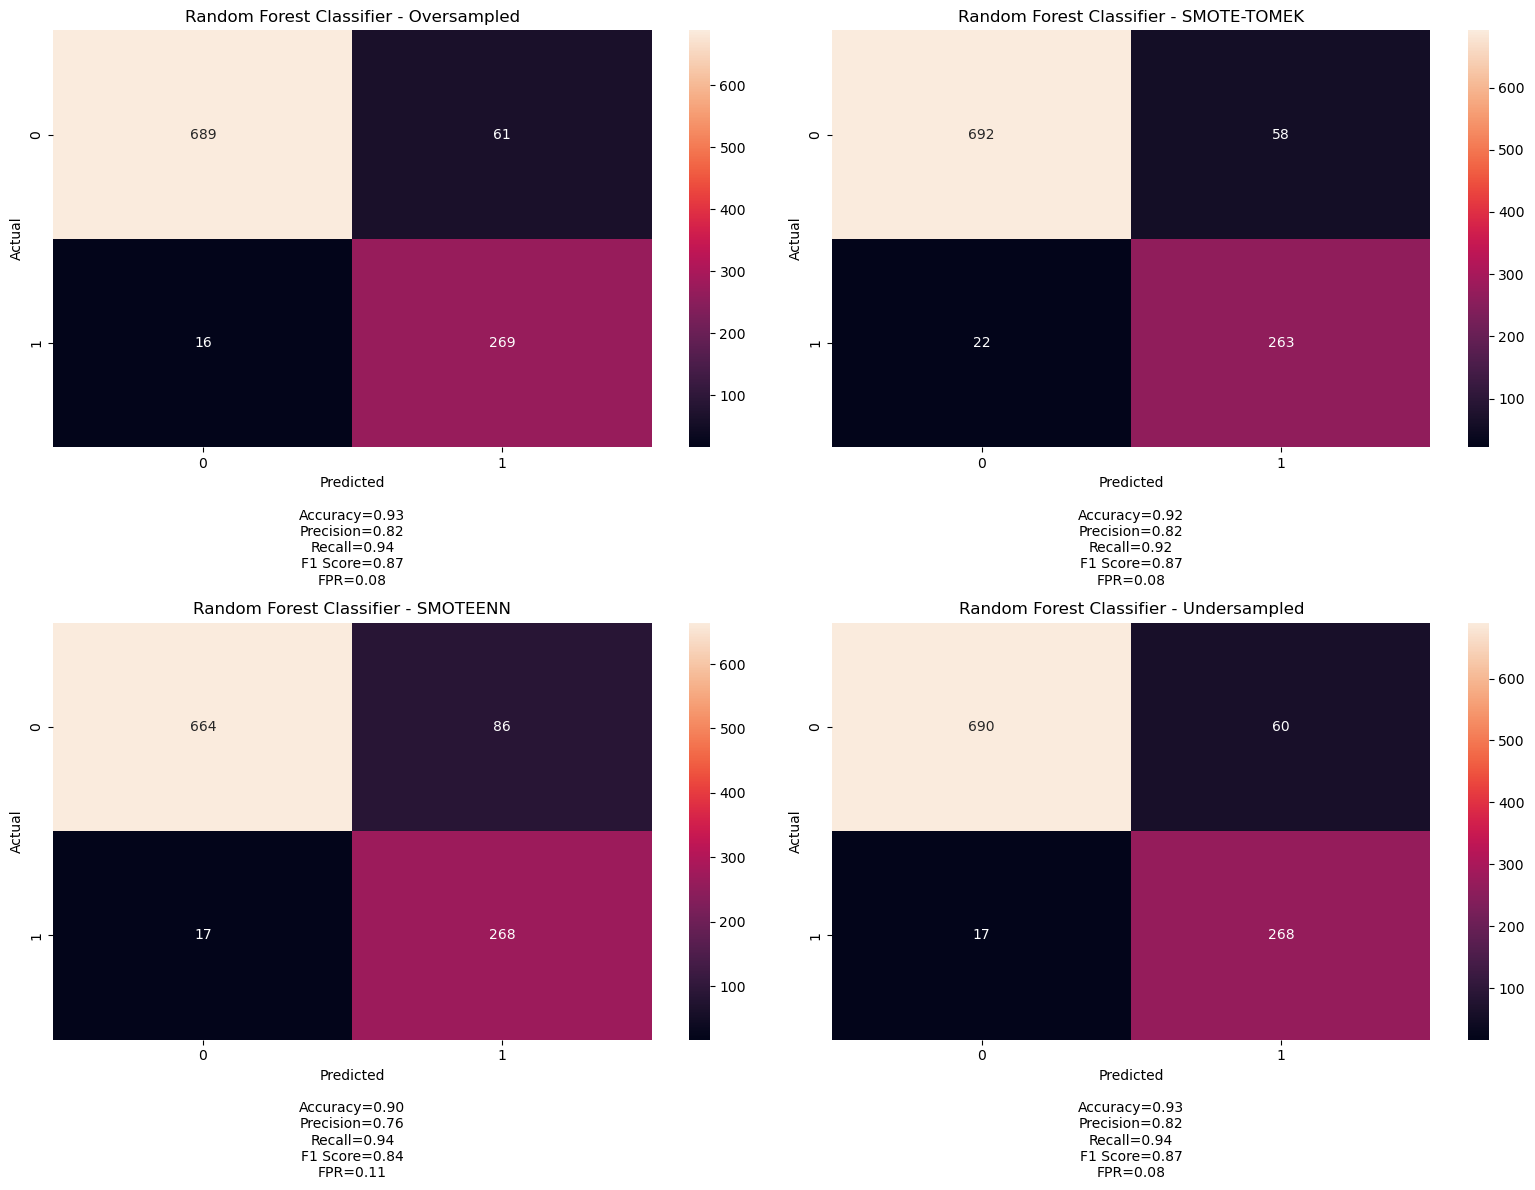

In [46]:
train_datasets = [df_oversampled, df_smote_tomek, df_smoteen, df_undersampled]
dataset_names = ["Oversampled", "SMOTE-TOMEK", "SMOTEENN", "Undersampled"]
# Train and evaluate Random Forests
rf_metrics_tables = evaluate_rf(train_datasets, dataset_names, df_test)


In [47]:
# Display metrics table for Random Forests
print("Random Forests Metrics Table:")
display_metrics_table(rf_metrics_tables, dataset_names)

Random Forests Metrics Table:


,Oversampled,SMOTE-TOMEK,SMOTEENN,Undersampled
Accuracy,0.925604,0.922705,0.900483,0.925604
Precision,0.815152,0.819315,0.757062,0.817073
Recall,0.943860,0.922807,0.940351,0.940351
F1 Score,0.874797,0.867987,0.838811,0.874388
FPR,0.081333,0.077333,0.114667,0.080000


In [70]:
train_datasets = [df_oversampled, df_smote_tomek, df_smoteen, df_undersampled]
dataset_names = ["Oversampled", "SMOTE-TOMEK", "SMOTEENN", "Undersampled"]
result_table = evaluate_dt_2(train_datasets, df_test, dataset_names)

# Print the result table
print("Metrics for the Decision Tree test model:")
print("\n")
print(result_table)

Metrics for the Decision Tree test model:


                     Oversampled  SMOTE-TOMEK  SMOTEENN  Undersampled
Accuracy                0.922705     0.919807  0.894686      0.922705
Precision               0.931044     0.926167  0.912030      0.930091
Recall                  0.922705     0.919807  0.894686      0.922705
F1 Score                0.924489     0.921371  0.898103      0.924369
False Positive Rate     0.062004     0.076158  0.074826      0.066354


In [51]:
def Naive_Bayes_Classifier(table, train, test, title):
    
    # Create Vocabulary
    vocabulary = list(train.columns)
    vocabulary.remove('Label')

    # Isolating spam and non-spam messages first
    spam_messages = train[train['Label'] == 1]
    non_spam_messages = train[train['Label'] == 0]

    # P(Spam) and P(Non-Spam)
    p_spam = len(spam_messages) / len(train)
    p_non_spam = len(non_spam_messages) / len(train)

    # N_Spam
    n_spam = spam_messages.iloc[:,1:-1].sum().sum()

    # N_Non-Spam
    n_non_spam = non_spam_messages.iloc[:,1:-1].sum().sum()

    # N_Vocabulary
    n_vocabulary = len(vocabulary)

    # Laplace smoothing
    alpha = 1

    # Initiate parameters
    parameters_spam = {unique_word:0 for unique_word in vocabulary}
    parameters_non_spam = {unique_word:0 for unique_word in vocabulary}

    # Calculate parameters
    for word in vocabulary:
        n_word_given_spam = spam_messages[word].sum()
        p_word_given_spam = (n_word_given_spam + alpha) / (n_spam + alpha*n_vocabulary)
        parameters_spam[word] = p_word_given_spam

        n_word_given_non_spam = non_spam_messages[word].sum()
        p_word_given_non_spam = (n_word_given_non_spam + alpha) / (n_non_spam + alpha*n_vocabulary)
        parameters_non_spam[word] = p_word_given_non_spam

    table = Score(table, test, p_spam, p_non_spam, parameters_spam, parameters_non_spam, title, "(TEST)")

    return table

train_datasets = {
    "Oversampled": df_oversampled,
    "SMOTE-Tomek": df_smote_tomek,
    "SMOTE-ENN": df_smoteen,
    "Undersampled": df_undersampled
}

table = pd.DataFrame()
performance_columns = []

for dataset_name, train_data in train_datasets.items():
    t = Naive_Bayes_Classifier(table, train_data, df_test, dataset_name)
    performance_columns.append(dataset_name + " Test")
    table = t

performance_metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]

table.columns = performance_columns
table.index = performance_metrics

print("Test Performance Metrics for naive bayes:\n", table)


Test Performance Metrics for naive bayes:
            Oversampled Test  SMOTE-Tomek Test  SMOTE-ENN Test  \
Accuracy           0.956243          0.958378        0.925604   
Precision          0.920188          0.933014        0.837662   
Recall             0.890909          0.886364        0.905263   
F1 Score           0.905312          0.909091        0.870152   

           Undersampled Test  
Accuracy            0.956243  
Precision           0.920188  
Recall              0.890909  
F1 Score            0.905312  


In [74]:
result_table = evaluate_dt_2(train_datasets, df_test, dataset_names)

# Print the result table
print("Metrics for the Decision Tree test model:")
print("\n")
print(result_table)
print("\n")
# Display metrics table for Random Forests
print("Random Forests Metrics Table:")
display_metrics_table(rf_metrics_tables, dataset_names)

print("\nNaive Bayes Metrics Table:")
print(nb_table.head())


Metrics for the Decision Tree test model:


                     Oversampled  SMOTE-TOMEK  SMOTEENN  Undersampled
Accuracy                0.921739     0.917874  0.888889      0.926570
Precision               0.929872     0.924747  0.907182      0.933814
Recall                  0.921739     0.917874  0.888889      0.926570
F1 Score                0.923515     0.919543  0.892563      0.928150
False Positive Rate     0.064546     0.076892  0.081380      0.060535


Random Forests Metrics Table:


,Oversampled,SMOTE-TOMEK,SMOTEENN,Undersampled
Accuracy,0.925604,0.922705,0.900483,0.925604
Precision,0.815152,0.819315,0.757062,0.817073
Recall,0.943860,0.922807,0.940351,0.940351
F1 Score,0.874797,0.867987,0.838811,0.874388
FPR,0.081333,0.077333,0.114667,0.080000



Naive Bayes Metrics Table:
           Oversampled Test  SMOTE-Tomek Test  SMOTE-ENN Test  \
Accuracy           0.956243          0.958378        0.925604   
Precision          0.920188          0.933014        0.837662   
Recall             0.890909          0.886364        0.905263   
F1 Score           0.905312          0.909091        0.870152   

           Undersampled Test  
Accuracy            0.956243  
Precision           0.920188  
Recall              0.890909  
F1 Score            0.905312  


# Conclusion

We are most concerned with the f1 score as it gives a good grasp on the precision along with the recall of the model.

Comparing the 3 models with the the same dataset that they were trained on we get:

oversampled:best f1 score is decision tree with a score of 92.3515%.
undersampled:best f1 score is decision tree with a score of 92.82%.
SMOTE-Tomek: best F1 score is Decision Tree with a score of 91.95%.
SMOTE-ENN: best F1 score is Decision Tree with a score of 89.26%.


Thus,based on our observations,Decision Tree seems to be the best classifier in this problem of classifying emails as spam and not spam